In [96]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import Sequential, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
csv_path = os.path.join(os.path.dirname(os.getcwd()),'data','raw_salaries.csv')
csv_path

'/Users/rkb/code/xkeeja/ds-mlops-week-full-recap/data/raw_salaries.csv'

In [20]:
df = pd.read_csv(csv_path)
df.head()

,EmpID,Name,Gender,Date_of_Birth,Age,Join_Date,Tenure_in_org_in_months,GROSS,Net_Pay,Deduction,Deduction_percentage,Designation,Department
0,19575,Keven Norman,M,3/9/94,25,2/12/19,7,74922,71494,3428,4.58,Product Operations Analyst.Associate.,IT Product Management & Ops
1,19944,Kristin Werner,F,23/06/1994,26,13/01/2020,6,44375,39971,4404,9.92,Platform Operations Engineer.Associate.,Platform Operations
2,20055,Avery Barber,M,27/02/1996,24,14/11/2019,8,82263,77705,4558,5.54,Platform Operations Engineer.Associate.,Platform Operations
3,20058,Boris Gibson,M,29/09/1993,26,13/01/2020,6,44375,40164,4211,9.49,Platform Operations Engineer.Associate.,Platform Operations
4,20332,Leif Mack,M,1/5/91,29,4/6/18,25,235405,143963,91442,38.84,Software Engineer.Senior.,Enterprise Access Engineering


In [37]:
X = df[['Age', 'Tenure_in_org_in_months']]
X

,Age,Tenure_in_org_in_months
0,25,7
1,26,6
2,24,8
3,26,6
4,29,25
...,...,...
1797,29,34
1798,27,33
1799,29,15
1800,47,30


In [56]:
enc = OneHotEncoder(categories=[['M','F']], sparse_output=False)
gender_enc = enc.fit_transform(df[['Gender']])
gender_enc

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [60]:
X_processed = np.hstack((gender_enc, np.array(X)))
X_processed.shape

(1802, 4)

In [58]:
y = df['GROSS']
y.shape

(1802,)

In [83]:
def initialize_model():
    model = Sequential()
    model.add(layers.Input(shape=X_processed.shape[1]))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1, activation="linear"))

    optimizer = optimizers.Adam(learning_rate=0.02)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mae"])
    
    return model


In [86]:
model = initialize_model()

es = EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

history = model.fit(
    X_processed,
    y,
    validation_split=0.3,
    epochs=500,
    batch_size=16,
    callbacks=[es],
    verbose=1
)

Epoch 1/500
79/79 [==============================] - 0s 2ms/step - loss: 49951645696.0000 - mae: 196051.3750 - val_loss: 23549939712.0000 - val_mae: 128515.1797
Epoch 2/500
79/79 [==============================] - 0s 838us/step - loss: 49901641728.0000 - mae: 195953.5938 - val_loss: 23409080320.0000 - val_mae: 128037.7656
Epoch 3/500
79/79 [==============================] - 0s 783us/step - loss: 49788727296.0000 - mae: 195722.3125 - val_loss: 23325530112.0000 - val_mae: 127836.6172
Epoch 4/500
79/79 [==============================] - 0s 755us/step - loss: 49614909440.0000 - mae: 195366.7344 - val_loss: 23306037248.0000 - val_mae: 127927.9844
Epoch 5/500
79/79 [==============================] - 0s 748us/step - loss: 49376931840.0000 - mae: 194881.7656 - val_loss: 23043170304.0000 - val_mae: 127079.7344
Epoch 6/500
79/79 [==============================] - 0s 814us/step - loss: 49074479104.0000 - mae: 194257.1719 - val_loss: 22701770752.0000 - val_mae: 126079.0547
Epoch 7/500
79/79 [=====

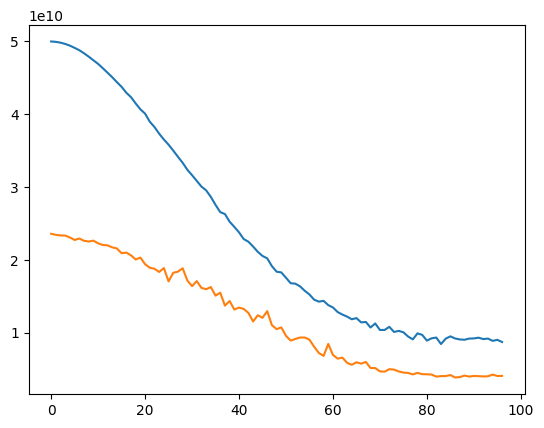

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [88]:
X_processed

array([[ 1.,  0., 25.,  7.],
       [ 0.,  1., 26.,  6.],
       [ 1.,  0., 24.,  8.],
       ...,
       [ 1.,  0., 29., 15.],
       [ 1.,  0., 47., 30.],
       [ 1.,  0., 27., 29.]])

In [98]:
model.predict([[1, 0, 25, 12]])

1/1 [==============================] - 0s 21ms/step


array([[102487.69]], dtype=float32)